### SparklyRGT Template: Baseline and Acquisition Analysis 

**Requirements**
* The data must be an excel file from MEDPC2XL (trial by trial data) 
* The data, sparklyRGT.py file, and this notebook must all be in the same folder

**Getting started: Please make a copy of this (sparklyRGT_template_2) for each analysis**
- Refer to sparklyRGT_documentation for function information
- Note: depending on your analysis, you will only have to complete certain sections of the sparklyRGT_documentation
- Note: feel free to create a personal template once you've become comfortable - this is just an example

In [1]:
import sparklyRGT as rgt 
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import scipy.stats as stats
# import model_data as md
pd.options.mode.chained_assignment = None
pd.set_option('display.max_rows',100)

I am being executed!


In [2]:
%load_ext autoreload
%autoreload 2

***

# 1) Load data into Python



In [3]:
#checks current working directory
os.getcwd()

#changes working directory to whatever is included in brackets
os.chdir("C:\\Users\\dexte\\sparklyRGT\\data") 
# os.chdir('/home/brett/sparklyRGT/data')

In [4]:
# #CH01 must be loaded in separately to drop the forced choice session that was accidentally included
# #for four rats

# fnames2 = ['CH01_raw-free_S8-19.xlsx']

# df2 = rgt.load_data(fnames2)
# #drop forced choice session:
# rgt.drop_sessions(df2, [6])
# #reset the session numbers to start from 1:
# rgt.edit_sessions(df2, orig_sess = list(range(8,20)),new_sess = list(range(1,13)))

In [5]:
# #set these variables for extracting the data using the model_data python script

# fnames = ['BH09_raw-free_S1-5_corrected.xlsx','CH02_raw-free_S8-15.xlsx','NA01_raw_free-choice_S8-18.xlsx']
# #change these to the names of the excel files that you want to run modeling on 

# #load in excel files into one df, resetting the session numbers to start at 1
# df1 = rgt.load_multiple_data(fnames, reset_sessions = True)



In [6]:
# rgt.check_sessions(df1)

In [7]:
# df = pd.concat([df1,df2], ignore_index = True)


In [8]:
fnames = ['BH09_raw-free_S1-5_corrected.xlsx','CH02_corrected.xlsx','NA01_raw_free-choice_S8-18.xlsx',"CH01_corrected.xlsx"]
df = rgt.load_multiple_data(fnames, reset_sessions = True)


In [9]:
#creates lists of subjects run on each task (classic A, classic B, etc.)

#rename MSNs so that the rats on the outcome task don't have "loss" in the MSN
for i in range(len(df)):
    if df.at[i, 'MSN'] == 'LossrGT_A-losscue_v1':
        df.at[i,'MSN'] = 'outcomeRGT_A'
    if df.at[i, 'MSN'] == 'LossrGT_B-losscue_v1':
        df.at[i,'MSN'] = 'outcomeRGT_B'
        
#rename MSNs so that the rats on the random task don't have "loss" in the MSN
for i in range(len(df)):
    if df.at[i,'MSN'] == 'AnarchyrGT_B-losscue_v6':
        df.at[i,'MSN'] = 'RandomRGT_B'
    if df.at[i,'MSN'] == 'AnarchyrGT_A-losscue_v6':
        df.at[i,'MSN'] = 'RandomRGT_A'
        
        
task_list = df.groupby(['MSN'])['Subject'].unique()

In [10]:
#these lines of code concatenates together the lists of subjects that run the same task (i.e., puts version A 
#and version B together) - based on unique string for each task name
uncued_subs = np.concatenate(task_list[[task for task in df.MSN.unique() if 'Classic' in task]])
standard_subs = np.concatenate((task_list['rGT_A-cue'], task_list['rGT_B-cue']))
#concatenating together MisRGT tasks, and RevRGT tasks, as they both refer to reverse-cue RGT
reverse_subs = np.concatenate((np.concatenate(task_list[[task for task in df.MSN.unique() if 'Mis' in task]]),
                              np.concatenate(task_list[[task for task in df.MSN.unique() if 'Rev' in task]])))
outcome_subs = np.concatenate(task_list[[task for task in df.MSN.unique() if 'outcome' in task]])
random_subs = np.concatenate(task_list[[task for task in df.MSN.unique() if 'Random' in task]])
loss_subs = np.concatenate(task_list[[task for task in df.MSN.unique() if 'oss' in task]])

subs = [uncued_subs,standard_subs, reverse_subs, outcome_subs,random_subs,loss_subs]

***
# 2A) Baseline & Acquisition Analysis


In [11]:
group_names = {0: 'uncued',
              1: 'cued',
              2: 'reverse',
              3: 'outcome',
              4: 'random', 
              5: 'loss'} 

group_list = [uncued_subs,standard_subs, reverse_subs, outcome_subs,random_subs,loss_subs]

title = 'Plot' #for plotting

startsess = 1 #first session you would like to include in figures
endsess = 5 #last session you would like to include in figures

## Data cleaning

### Check session numbers for each rat

In [12]:
rgt.check_sessions(df)

Subject  StartDate            Session
101      2021-06-29 00:00:00  1          104.0
         2021-06-30 00:00:00  2          155.0
         2021-07-01 00:00:00  3          137.0
         2021-07-02 00:00:00  4          128.0
         2021-07-05 00:00:00  5          128.0
102      2021-06-29 00:00:00  1          102.0
         2021-06-30 00:00:00  2          129.0
         2021-07-01 00:00:00  3           83.0
         2021-07-02 00:00:00  4          112.0
         2021-07-05 00:00:00  5           75.1
103      2021-06-29 00:00:00  1           57.0
         2021-06-30 00:00:00  2           84.0
         2021-07-01 00:00:00  3           62.0
         2021-07-02 00:00:00  4           57.0
         2021-07-05 00:00:00  5           58.0
104      2021-06-29 00:00:00  1           75.0
         2021-06-30 00:00:00  2           70.0
         2021-07-01 00:00:00  3           77.1
         2021-07-02 00:00:00  4           46.0
         2021-07-05 00:00:00  5           58.0
105      2021-06-29 00

### Drop/edit session numbers

In [13]:
# df2 = rgt.drop_sessions(df, [6])
# df2 = rgt.edit_sessions(df, orig_sess = [0], new_sess = [15], subs = "all")

### Check that you dropped/edited the desired session(s)

In [14]:
# rgt.check_sessions(df2) 

## Data processing

### Calculate variables for each rat


In [15]:
df_sum = rgt.get_summary_data(df) #change to df instead of df2 if you didn't do any session editing
df_sum.loc[:,'risk1':'risk5'] 

,risk1,risk2,risk3,risk4,risk5
101,84.6154,96.1039,95.6204,93.75,95.3125
102,70.297,79.5276,71.0843,78.3784,60
103,-96.3636,-3.61446,-19.3548,-15.7895,-27.5862
104,44,14.2857,9.09091,-21.7391,10.3448
105,29.8246,61.1111,72,97.2973,68
106,53.0612,72.4771,73.1959,86.4078,91.3043
107,71.9298,63.3333,50.8772,68,38.4615
108,55.8824,81.6092,90.8257,91.9192,97.9592
109,47.5728,38.4615,56.5217,73.913,77.1429
110,41.1765,55.5556,67.9012,78.4314,84.0708


### Get the risk status of the rats


In [16]:
df_sum, risky, optimal = rgt.get_risk_status(df_sum, startsess, endsess)

print(df_sum[['mean_risk','risk_status']]) 
print(risky, optimal) 

     mean_risk  risk_status
101  93.080444          1.0
102  71.857461          1.0
103 -32.541723          2.0
104  11.196464          1.0
105  65.646594          1.0
106  75.289256          1.0
107  58.520378          1.0
108  83.639122          1.0
109  58.722399          1.0
110  65.427086          1.0
111  37.719367          1.0
112  68.953866          1.0
113  66.921358          1.0
114  79.739974          1.0
115  47.343677          1.0
116  28.000323          1.0
117  51.081264          1.0
118  84.380643          1.0
119  79.792296          1.0
120  -4.920606          2.0
121  34.796426          1.0
122  53.760711          1.0
123  85.905183          1.0
124  68.284840          1.0
125  -1.458505          2.0
126  71.822400          1.0
127  44.854548          1.0
128  21.708748          1.0
129  78.428890          1.0
130  82.217400          1.0
131  97.838932          1.0
132  68.354090          1.0
133  22.692805          1.0
134  91.138734          1.0
135  92.367449      

### Export your data to an Excel file 


In [17]:
# rgt.export_to_excel(df_sum, groups = group_list, column_name = '', new_file_name = '', asin = True)

## Calculate means and SEMs for your experimental groups



In [18]:
mean_scores, SEM = rgt.get_means_sem(df_sum, groups = group_list, group_names = group_names)
mean_scores
# SEM

,1P1,1P2,1P3,1P4,2P1,2P2,2P3,2P4,3P1,3P2,...,prem5,prem6,prem7,prem8,prem9,prem10,prem11,prem12,mean_risk,risk_status
uncued,38.5103,37.3686,14.3425,9.77854,38.7897,44.7755,8.91324,7.52165,37.2344,48.188,...,26.5633,22.9248,19.6032,18.2633,26.9221,24.1636,24.8914,23.6908,68.579,1
cued,32.3508,33.3322,18.4061,15.911,30.8003,35.0933,16.9034,17.203,28.0232,36.9881,...,33.8783,32.1835,33.7255,32.2708,35.7745,32.8765,30.9139,33.0943,28.3726,1.34375
reverse,34.5916,35.9486,18.0901,11.3697,33.9872,39.3344,16.8033,9.87513,32.7428,43.7344,...,33.1927,34.7989,34.5787,36.2332,38.2743,41.8362,32.2326,32.9955,48.837,1.14286
outcome,24.7875,39.0196,22.4822,13.7107,26.5449,42.356,20,11.0992,23.301,46.0871,...,28.2217,28.3729,36.0769,30.9646,NaN,NaN,NaN,NaN,36.2156,1.08
random,41.4976,32.5706,14.727,11.2049,41.5945,35.6629,14.1222,8.62038,35.1432,44.1527,...,22.2134,14.2707,16.4128,12.7249,18.1693,22.8944,17.3933,NaN,57.6838,1.14286
loss,33.8815,42.2158,16.2889,7.61377,33.1778,48.9092,12.1985,5.71458,33.1741,53.0079,...,23.1957,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68.9791,1.03571


# 2B) Baseline & Acquisition Analysis: Plotting


## Bar plot of P1-P4 % choice


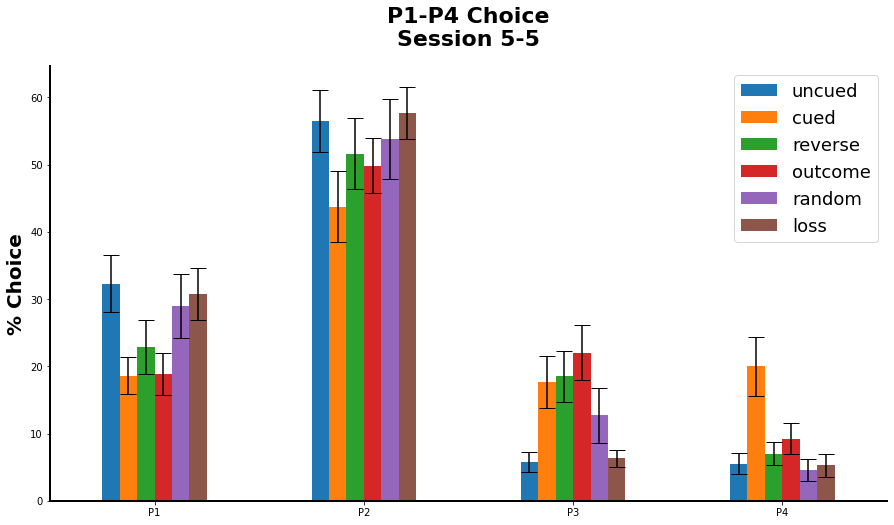

In [19]:
rgt.choice_bar_plot(endsess, endsess, mean_scores, SEM)

#To save figure:
# plt.savefig('BH07 Choice S29-30',facecolor = 'white')

## Line plot of other variables


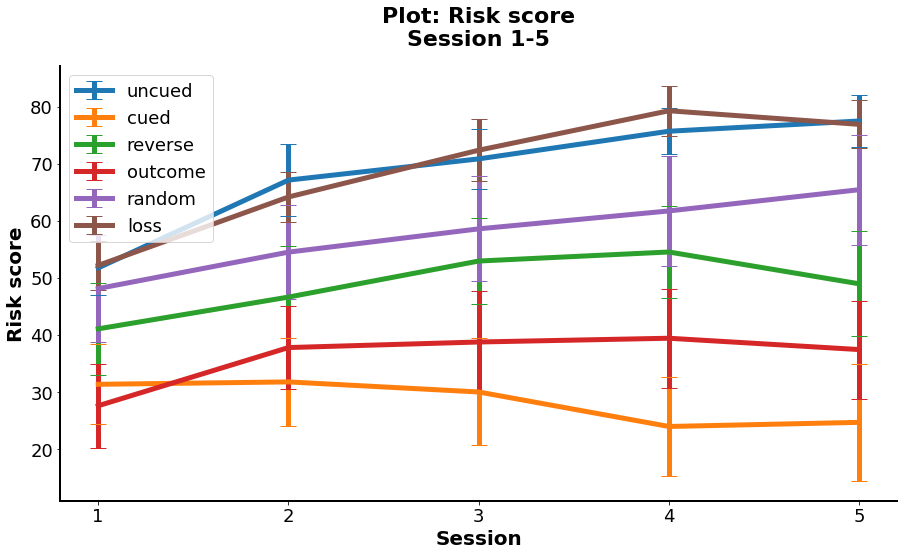

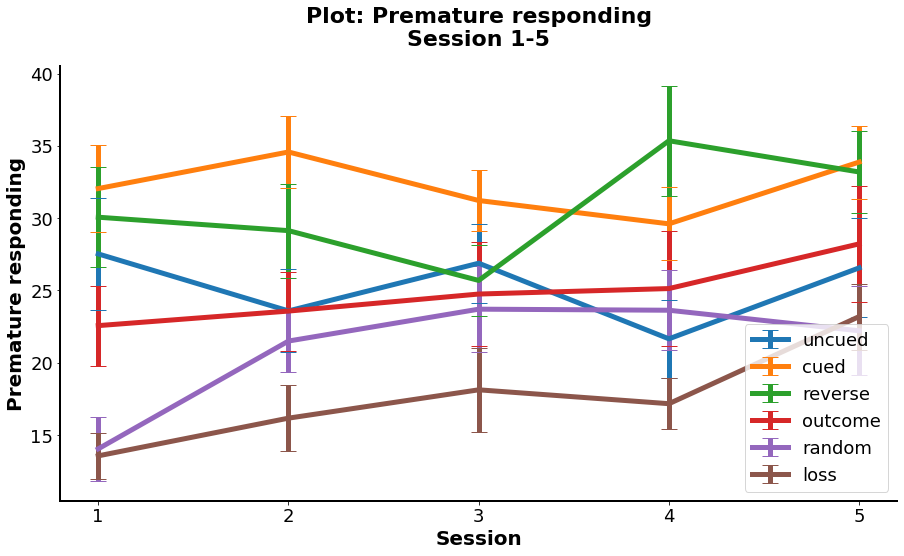

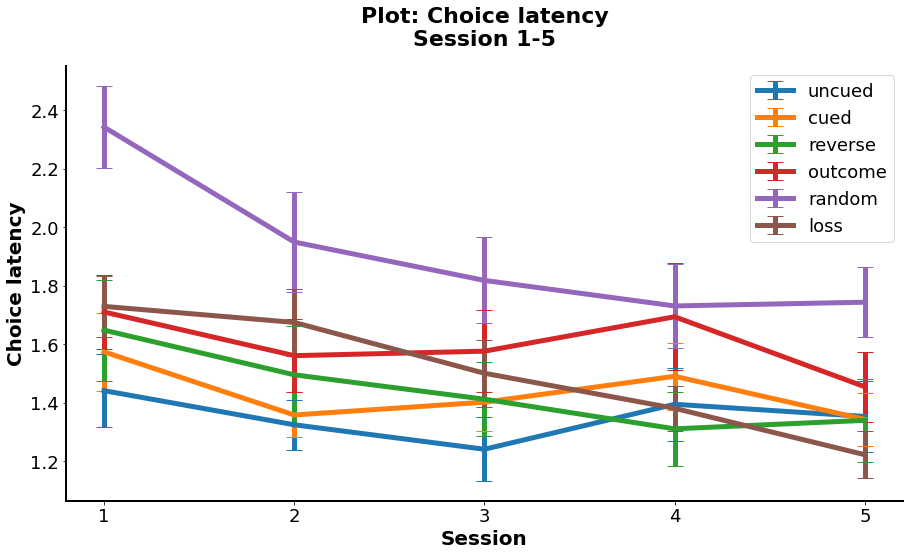

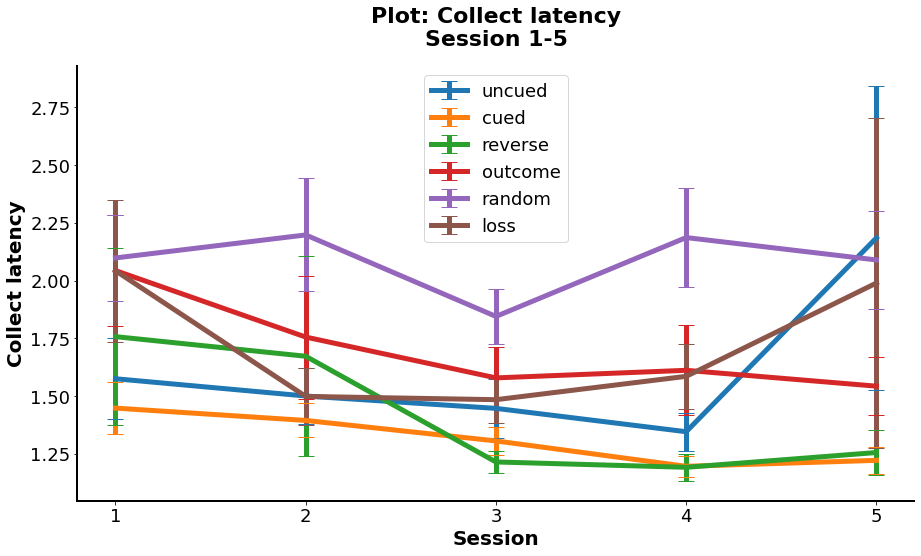

In [20]:
rgt.rgt_plot('risk', startsess, endsess, title, mean_scores, SEM, group_names = group_names, y_label = 'Risk score') 
plt.savefig('rgt variants - risk score S1-5',facecolor = 'white')

rgt.rgt_plot('prem', startsess, endsess, title, mean_scores, SEM, group_names = group_names, y_label = 'Premature responding')
rgt.rgt_plot('choice_lat', startsess, endsess, title, mean_scores, SEM, group_names = group_names, y_label = 'Choice latency')
rgt.rgt_plot('collect_lat', startsess, endsess, title, mean_scores, SEM, group_names = group_names, y_label = 'Collect latency')


## Bar plot of other variables



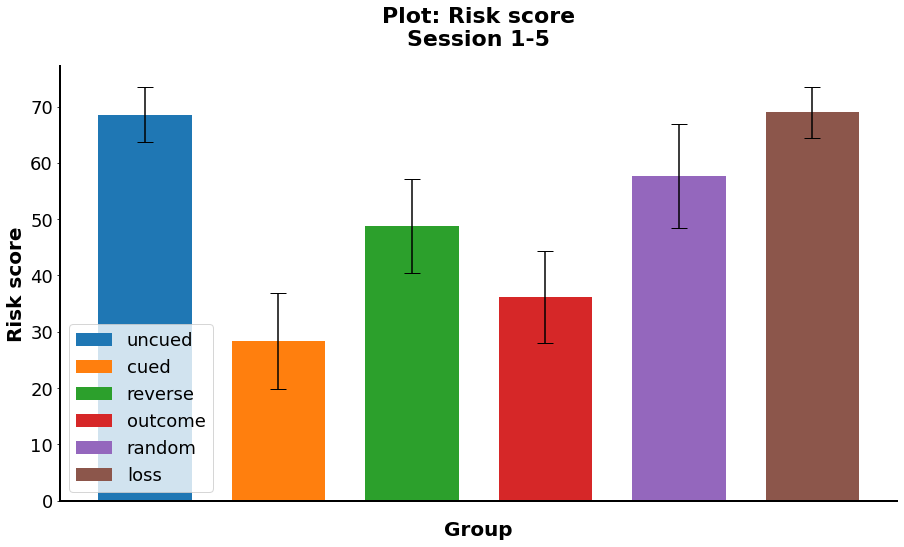

In [21]:
rgt.rgt_bar_plot('risk', startsess, endsess, title, mean_scores, SEM, group_names, y_label = 'Risk score')

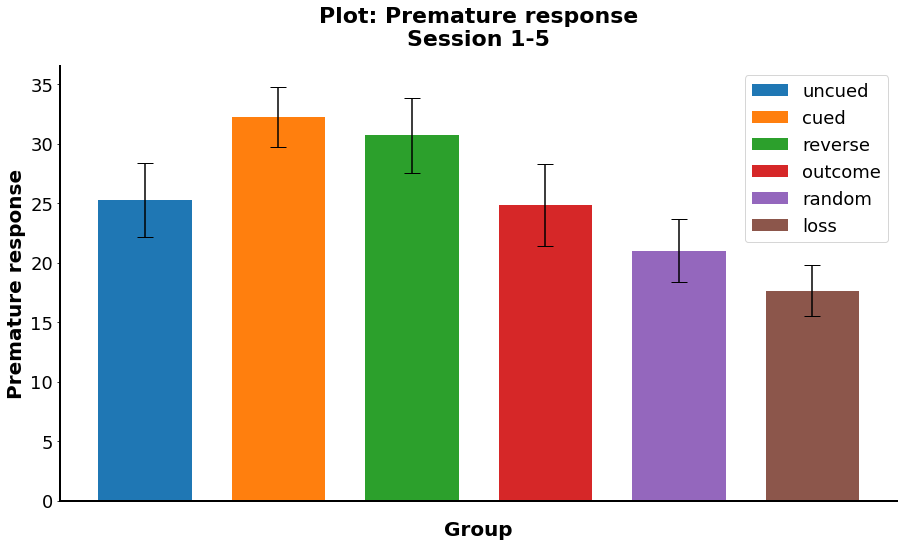

In [22]:
rgt.rgt_bar_plot('prem', startsess, endsess, title, mean_scores, SEM, group_names, y_label = 'Premature response')

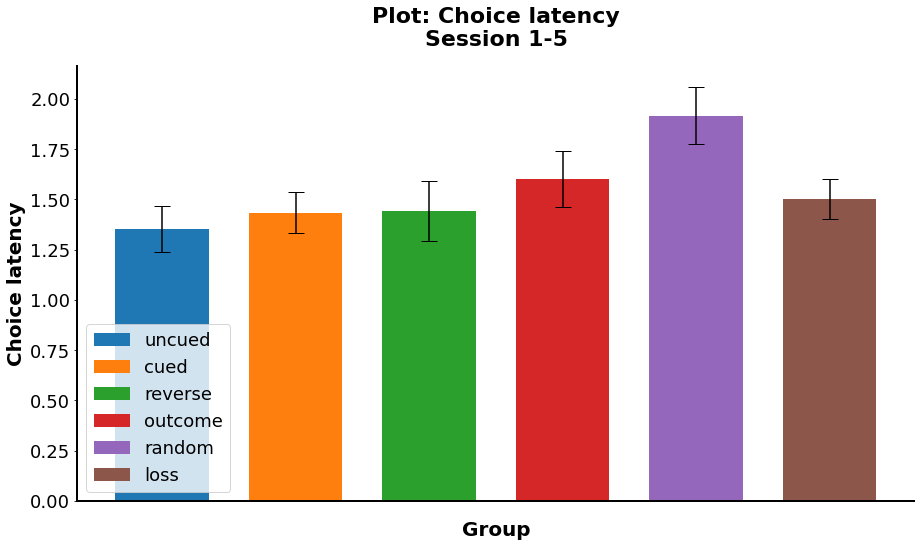

In [23]:
rgt.rgt_bar_plot('choice_lat', startsess, endsess, title, mean_scores, SEM, group_names, y_label = 'Choice latency')

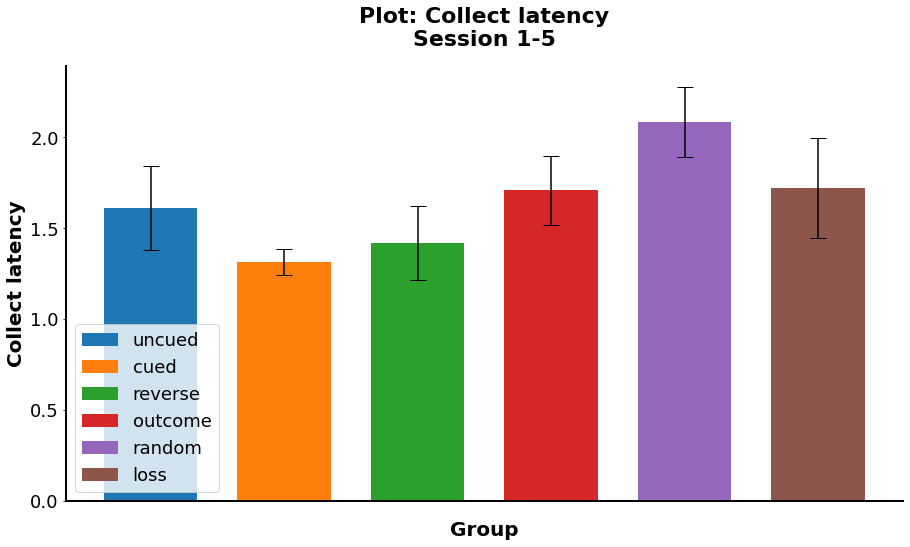

In [24]:
rgt.rgt_bar_plot('collect_lat', startsess, endsess, title, mean_scores, SEM, group_names, y_label = 'Collect latency')

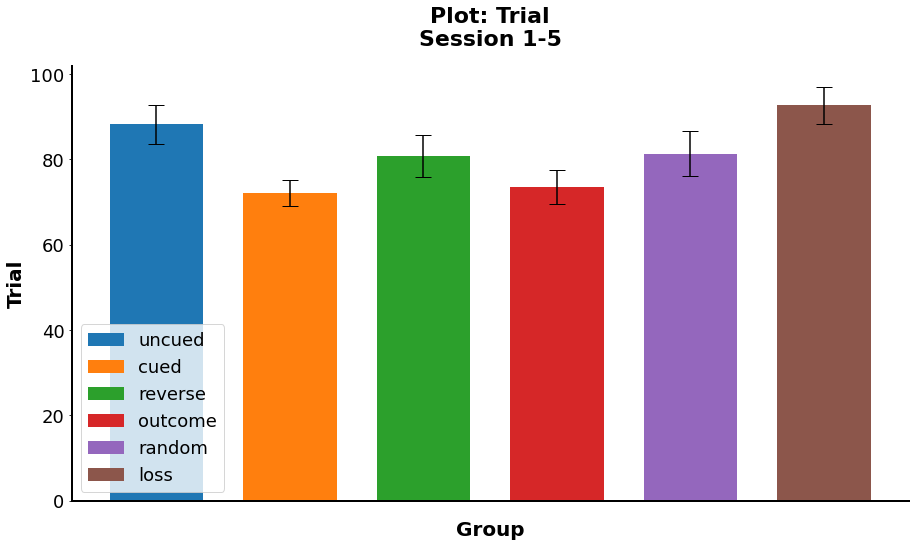

In [25]:
rgt.rgt_bar_plot('trial', startsess, endsess, title, mean_scores, SEM, group_names, y_label = 'Trial')